<a href="https://colab.research.google.com/github/Kzis/ml-programming-python/blob/master/Homework/HW4-KNN/KNN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
sns.set()

In [12]:
# load dataset
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


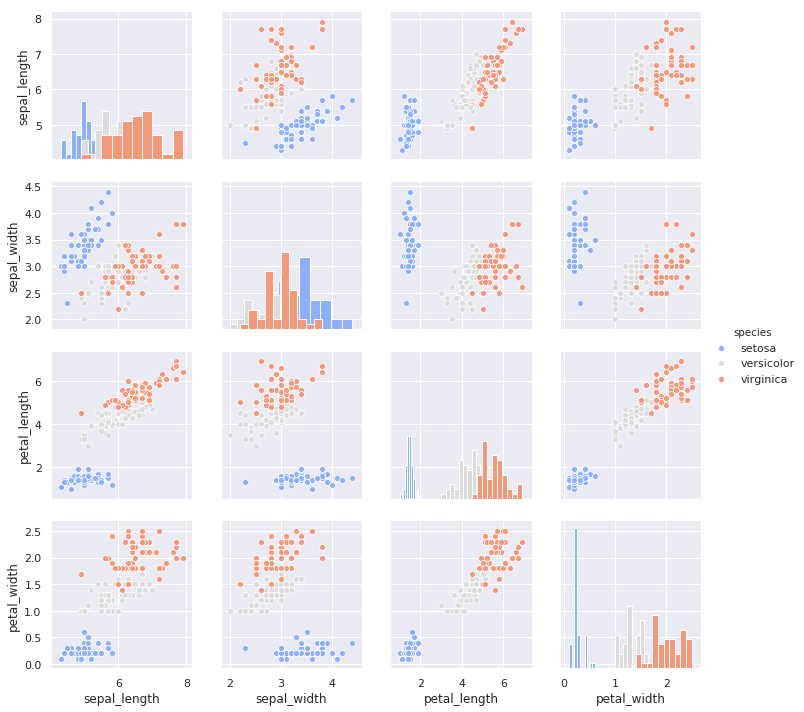

In [14]:
sns.pairplot(df, hue='species', palette='coolwarm', diag_kind='hist')

In [0]:
X = df.drop('species', axis=1)
y = df['species']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =10 )

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_test) 

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [0]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 50, 2)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # knn = estimator = The object to use to fit the data.
    cv_scores.append(scores.mean())
    

Text(0, 0.5, 'Misclassification Error')

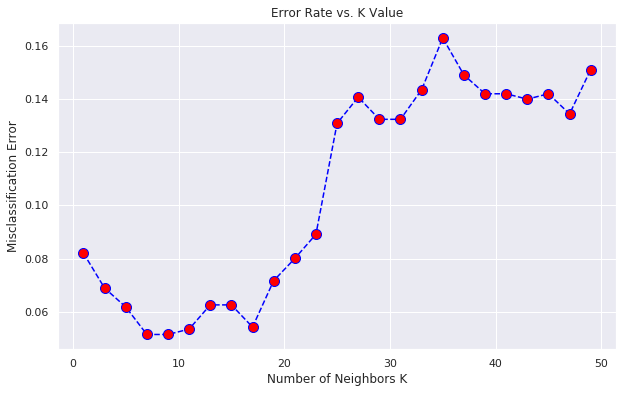

In [23]:
error = [1 - x for x in cv_scores]

plt.figure(figsize=(10,6))
plt.plot(neighbors, error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [24]:
optimal_k = neighbors[error.index(min(error))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 7


In [25]:
# NOW WITH K=optimal_k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f"WITH K={optimal_k}")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[14  0  0]
 [ 0 15  2]
 [ 0  0 14]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.94        17
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [26]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=10,
    n_jobs=-1
    )
gs_results = gs.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
gs_results.best_score_

0.9428571428571428

In [28]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [29]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [0]:
best_knn = gs_results.best_estimator_

In [0]:
y_pred = best_knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

